({'image': array([[  52.,  150.,  211., ...,  124.,  124.,  112.]], dtype=float32)}, array([3], dtype=int32), array([0], dtype=int32))
[[[ 0.20392157  0.58823532  0.82745099]
  [ 0.20392157  0.58823532  0.82745099]
  [ 0.20392157  0.58823532  0.82745099]
  ..., 
  [ 0.34509805  0.41960785  0.42352942]
  [ 0.34901962  0.41568628  0.42352942]
  [ 0.31764707  0.3764706   0.3882353 ]]

 [[ 0.22352941  0.60784316  0.84705883]
  [ 0.22352941  0.60784316  0.84705883]
  [ 0.21960784  0.60392159  0.84313726]
  ..., 
  [ 0.36078432  0.43529412  0.43137255]
  [ 0.35686275  0.42745098  0.42745098]
  [ 0.36862746  0.43137255  0.43137255]]

 [[ 0.21568628  0.60000002  0.8392157 ]
  [ 0.21568628  0.60000002  0.8392157 ]
  [ 0.21176471  0.59607846  0.83529413]
  ..., 
  [ 0.33725491  0.41568628  0.40392157]
  [ 0.34117648  0.41176471  0.40392157]
  [ 0.37254903  0.43529412  0.43137255]]

 ..., 
 [[ 0.09803922  0.13725491  0.17254902]
  [ 0.09411765  0.13725491  0.16078432]
  [ 0.09019608  0.13333334  

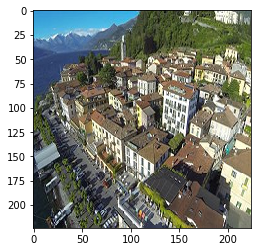

In [20]:
import tensorflow as tf
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()
sess.run(tf.global_variables_initializer())

def parser(record):
    keys_to_features = {
        "image_raw": tf.FixedLenFeature([], tf.string),
        "label":     tf.FixedLenFeature([], tf.int64),
         "label_1":     tf.FixedLenFeature([], tf.int64)}
    parsed = tf.parse_single_example(record, keys_to_features)
    image = tf.decode_raw(parsed["image_raw"], tf.uint8)
    image = tf.cast(image, tf.float32)
    #image = tf.reshape(image, shape=[224, 224, 3])
    label = tf.cast(parsed["label"], tf.int32)
    label_1=tf.cast(parsed["label_1"],tf.int32)
    return {'image': image}, label, label_1


def input_fn(filenames):
    dataset = tf.data.TFRecordDataset(filenames=filenames, num_parallel_reads=40)
    dataset = dataset.apply(
      tf.contrib.data.shuffle_and_repeat(1024, 1)
    )
    dataset = dataset.apply(
      tf.contrib.data.map_and_batch(parser, 1)
    )
    #dataset = dataset.map(parser, num_parallel_calls=12)
    #dataset = dataset.batch(batch_size=1000)
    dataset = dataset.prefetch(buffer_size=2)
    return dataset


def train_input_fn():
    return input_fn(filenames=['/nfs/sleipnir2/Samriddha_Sturcutred_Embedding/train_with_two_labels.tfrecords' 
])

def val_input_fn():
    return input_fn(filenames=["val.tfrecords"])

def main():
    dataset=train_input_fn()
    iterate = dataset.make_one_shot_iterator()
    el = iterate.get_next()
    with tf.Session() as sess:
        lis=sess.run(el)
    print(lis)
    lis=lis[0]
    lis=lis['image']
    lis=lis.squeeze()
    lis=lis.reshape(224,224,3)
    lis=lis/255.
    print(lis)
    plt.imshow(lis)
main()

In [14]:
import tensorflow as tf
import cv2
import sys
import numpy as np
import keras
sess = tf.Session()
sess.run(tf.global_variables_initializer())

def parser(record):
    keys_to_features = {
        "image_raw": tf.FixedLenFeature([], tf.string),
        "label":     tf.FixedLenFeature([], tf.int64)
    }
    parsed = tf.parse_single_example(record, keys_to_features)
    image = tf.decode_raw(parsed["image_raw"], tf.uint8)
    image = tf.cast(image, tf.float32)
    #image = tf.reshape(image, shape=[224, 224, 3])
    label = tf.cast(parsed["label"], tf.int32)

    return {'image': image}, label


def input_fn(filenames):
  dataset = tf.data.TFRecordDataset(filenames=filenames, num_parallel_reads=40)
  dataset = dataset.apply(
      tf.contrib.data.shuffle_and_repeat(1024, 1)
  )
  dataset = dataset.apply(
      tf.contrib.data.map_and_batch(parser, 32)
  )
  #dataset = dataset.map(parser, num_parallel_calls=12)
  #dataset = dataset.batch(batch_size=1000)
  dataset = dataset.prefetch(buffer_size=2)
  return dataset


def train_input_fn():
    return input_fn(filenames=["train.tfrecords", "test.tfrecords"])

def val_input_fn():
    return input_fn(filenames=["val.tfrecords"])